In [ ]:
import os
import polars as pl

# from mpl_toolkits.basemap import Basemap

# download list of stations from OSCAR/Surface with country=="Kenya" and save as .csv
file = "StationSearchResults-20240909.csv"

df_all = pl.read_csv(file)
df_all = df_all.with_columns(pl.col(pl.String).str.replace_all("\t", ""))
df_all.columns = [s.strip() for s in df_all.columns]
# {
#             "wigosId": "0-404-300-301570787AS00074",
#             "name": "AIC Churo Girls  High School",
#             "lat": 0.7668''''','''''
#             "lon": 36.4056,
#             "ele": 1798.0,
#             "facilityType": "landFixed",
#             "observedProperties": [
#                 251,
#                 210,
#                 216,
#                 224,
#                 12005,
#                 12006
#             ],
#             "dateEstablished": "2021-11-29Z",
#             "dateClosed": NaN,
#             "reportingStatus": "operational"
#         },
df_all = df_all.rename({'WIGOS Station Identifier(s)': 'wigosId',
               'Station': 'stations',
               'Latitude': 'lat',
               'Longitude': 'lon',
               'Elevation': 'ele',
               'Station type': 'facilityType',
               'Date established': 'dateEstablished',
               'Date closed': 'dateClosed',
               'Declared reporting status': 'reportingStatus',
               })
df_all = df_all.drop(['Station alias', 
                      'Assessed reporting status', 
                      'WMO Region', 
                      'Regional WIGOS Center', 
                      'Country', 
                      'Geopositioning method', 
                      'Time zone', 
                      'Supervising organization', 
                      'Station URL', 
                      'Other link (URL)', 
                      'Site description', 
                      'Climate zone', 
                      'Predominant surface cover', 
                      'Surface roughness', 
                      'Topography or bathymetry', 
                      'Population in 10km/50km', 
                      'Programs/Network affiliation', 
                      'Last updated date', 
                      'Last updated by', 
                      ])
df_all.write_json(file=file.replace(".csv", ".json"),
                  )
df_all.schema


In [ ]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# # setup Lambert Conformal basemap.
# m = Basemap(width=12000000,height=9000000,projection='lcc',
#             resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# # draw coastlines.
# m.drawcoastlines()
# # draw a boundary around the map, fill the background.
# # this background will end up being the ocean color, since
# # the continents will be drawn on top.
# m.drawmapboundary(fill_color='aqua') 
# # fill continents, set lake color same as ocean color. 
# m.fillcontinents(color='coral',lake_color='aqua')
# plt.show()

In [1]:
import pandas as pd
import json

json_file = "StationSearchResults-20240909.json"

df = open(json_file)
df = pd.DataFrame(json.load(df))


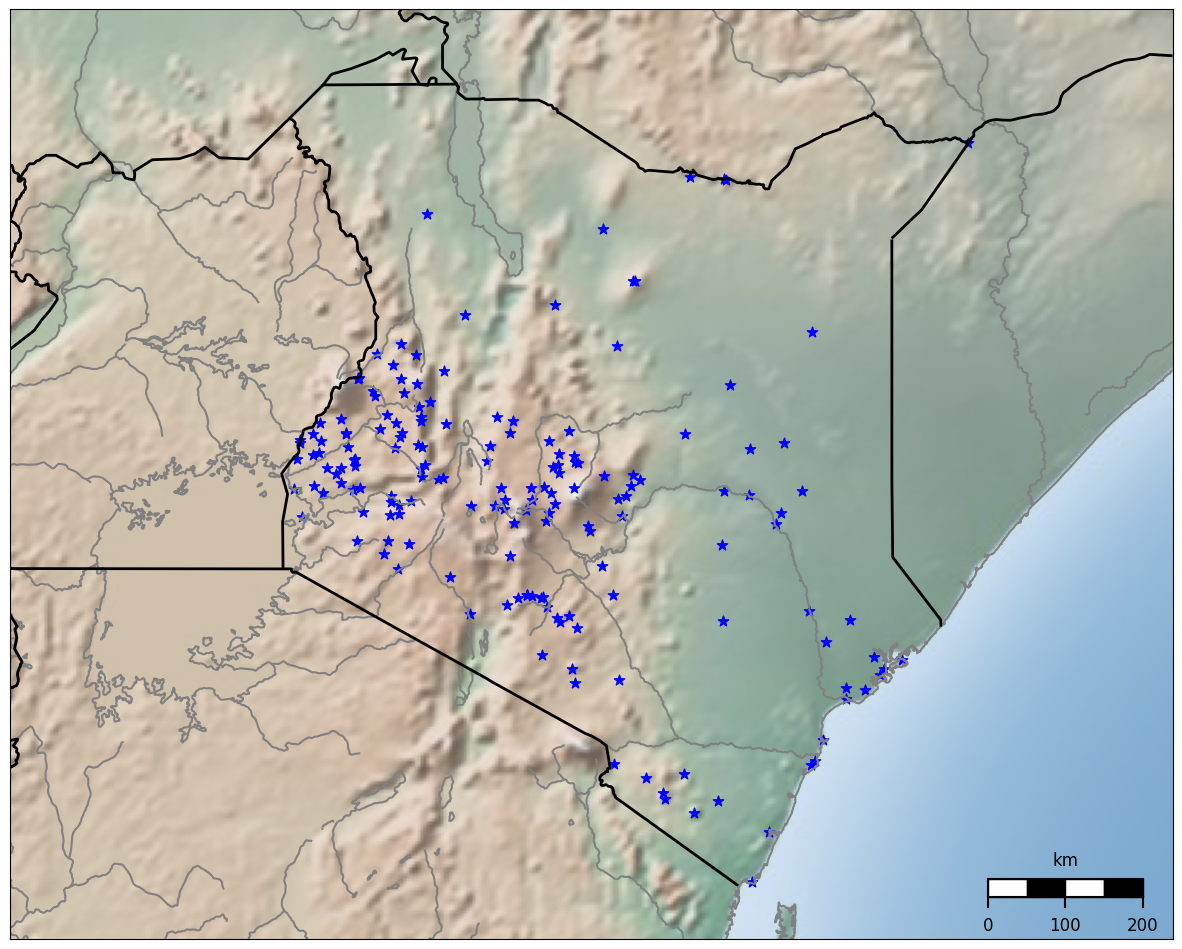

In [3]:
from create_plots import plot_overview_map
plot_overview_map(df=df, reporting=False)

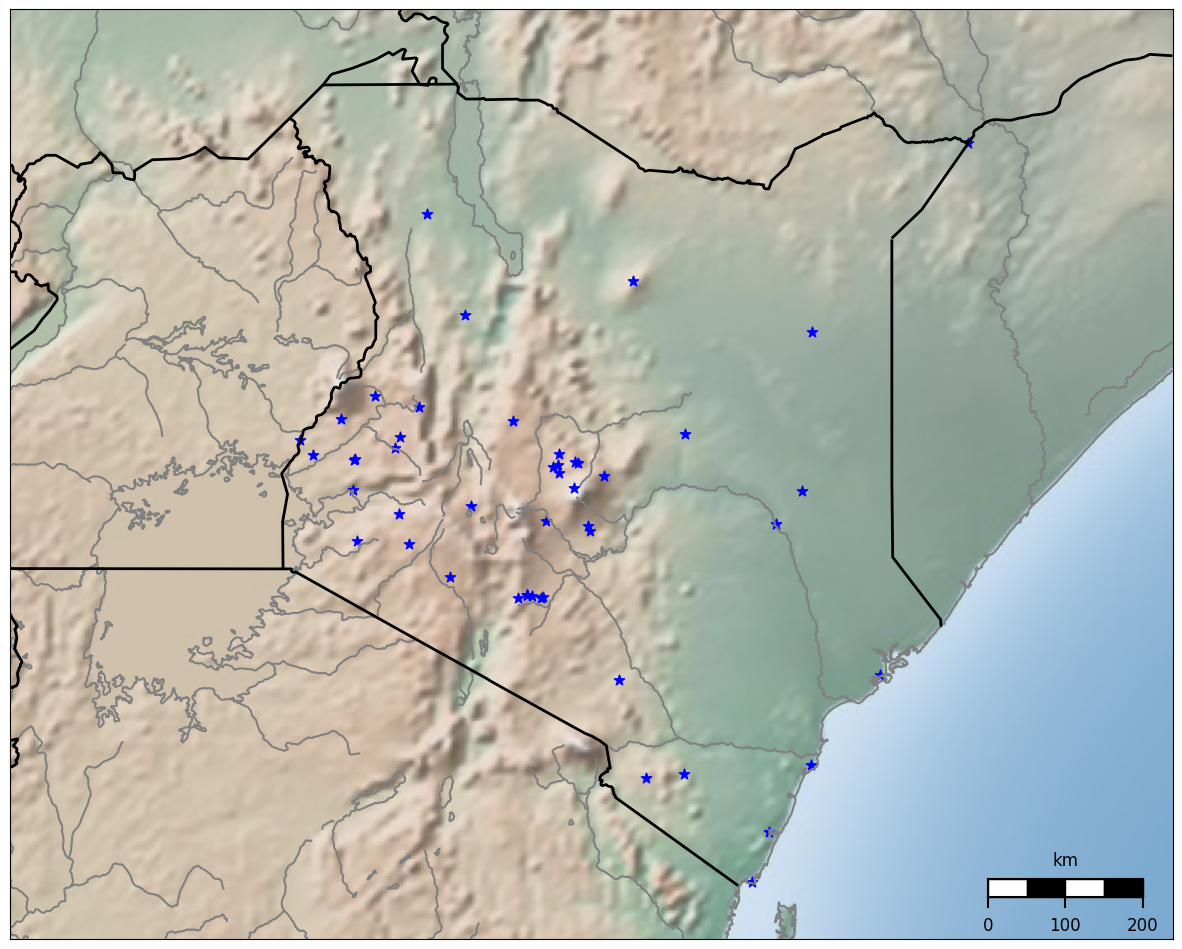

In [10]:
pre_kadi_registrations = ['1901045','1901046','1901047','1901048','1901049','ALUPE','BOMET','BORANA CENTER','BUMULA','BURA','CHWELE','DAGORETTI CORNER','DAGORETTI CORNER AWS','ELDORET INTERNATIONAL AIRPORT','ELDORET KAPSOYA','EMBU','EMBU AUTOMATIC WEATHER STATION','GARBATULLA RANET AUTOMATIC WEATHER STATION','GARISSA','JOMO KENYATTA NTERNATIONAL AIRPORT','KAKAMEGA','KAKAMEGA MET AWS','KERICHO','KISII','KISUMU','KITALE','LAMU','LODWAR','LOKORI','LOLLDAIGA HILLS- BARRIER','LOLLDAIGA HILLS CENTRE','LOLLDAIGA HILLS- NORTHERN','LOLLDAIGA HILLS- WESTERN','MAKINDU','MAKTAU FARM','MANDERA','MARSABIT','MERU','MOIBEN CHEBARA DAM','MOMBASA INTERNATIONAL AIRPORT','Mt. Kenya','MUGIE CENTER','Nairobi','NAKURU','NAROK','NGARE NDARE FARM','NGONG AUTOMATIC WEATHER STATION','NYERI','RADAR DWSR-8501 - JKIA','RADAR DWSR-8501 - MALINDI','SHIMONI','VOI','WAJIR','WILSON',]

df_pre_kadi = df[df['stations'].isin(pre_kadi_registrations)]

plot_overview_map(df=df_pre_kadi, reporting=False)